In [1]:
import warnings
from pathlib import Path

import numpy as np
import pandas as pd
import soundscapy as sspy
from soundscapy.utils.parameters import LANGUAGE_ANGLES, PAQ_IDS

import optimize_target as ot
from MultiSkewNorm import MultiSkewNorm

warnings.filterwarnings("ignore")

/workspaces/J2401_JASA_SSID-Single-Index/.venv/lib/python3.11/site-packages/rpy2/robjects/numpy2ri.py:241: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/workspaces/J2401_JASA_SSID-Single-Index/.venv/lib/python3.11/site-packages/rpy2/robjects/pandas2ri.py:368: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


In [2]:
# Load latest ISD dataset
# data = sspy.isd.load_zenodo()
# Load latest ISD dataset

data = sspy.isd.load()
data, excl_data = sspy.isd.validate(data)
data = data.query("Language != 'cmn'")

# Exclude RegentsParkJapan outliers
# excl_id = list(data.query("LocationID == 'RegentsParkJapan'").query("ISOEventful > 0.72 | ISOEventful < -0.5").index)
# Excluded RegentsParkFields outliers
# excl_id = excl_id + list(data.query("LocationID == 'RegentsParkFields' and ISOPleasant < 0").index) # Helicopters
excl_id = [652, 706, 548, 550, 551, 553, 569, 580, 609, 618, 623, 636, 643]
data.drop(excl_id, inplace=True)
data

Renaming PAQ columns.
Checking PAQ data quality.
Identified 109 samples to remove.
[6, 9, 13, 30, 32, 46, 190, 213, 229, 244, 296, 412, 413, 428, 464, 485, 655, 734, 739, 762, 766, 780, 1067, 1274, 1290, 1316, 1320, 1338, 1346, 1347, 1397, 1425, 1431, 1446, 1447, 1470, 1485, 1491, 1504, 1505, 1510, 1512, 1517, 1522, 1523, 1527, 1599, 1698, 1734, 1817, 1911, 1948, 2069, 2107, 2109, 2111, 2150, 2199, 2277, 2293, 2384, 2386, 2490, 2523, 2584, 2592, 2695, 2762, 2767, 2783, 2789, 2825, 2826, 2832, 2840, 2856, 2859, 2879, 2883, 2889, 2910, 2932, 2956, 2969, 3031, 3058, 3077, 3124, 3149, 3163, 3185, 3202, 3210, 3211, 3212, 3213, 3214, 3215, 3216, 3272, 3302, 3365, 3414, 3491, 3502, 3510, 3517, 3533, 3583]


,LocationID,SessionID,GroupID,RecordID,start_time,end_time,latitude,longitude,Language,Survey_Version,...,RA_cp90_Max,RA_cp95_Max,THD_THD_Max,THD_Min_Max,THD_Max_Max,THD_L5_Max,THD_L10_Max,THD_L50_Max,THD_L90_Max,THD_L95_Max
0,CarloV,CarloV2,2CV12,1434,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,8.15,6.72,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29
1,CarloV,CarloV2,2CV12,1435,2019-05-16 18:46:00,2019-05-16 18:56:00,37.17685,-3.590392,eng,engISO2018,...,8.15,6.72,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29
2,CarloV,CarloV2,2CV13,1430,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
3,CarloV,CarloV2,2CV13,1431,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
4,CarloV,CarloV2,2CV13,1432,2019-05-16 19:02:00,2019-05-16 19:12:00,37.17685,-3.590392,eng,engISO2018,...,5.00,3.91,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Noorderplantsoen,Noorderplantsoen1,NP161,61,2020-03-11 12:42:00,2020-03-11 12:55:00,NaN,NaN,nld,nldSSIDv1,...,2.54,2.00,-3.17,-11.97,59.64,37.87,26.54,6.33,-9.79,-10.34
1694,Noorderplantsoen,Noorderplantsoen1,NP162,63,2020-03-11 12:39:00,2020-03-11 13:00:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1695,Noorderplantsoen,Noorderplantsoen1,NP162,62,2020-03-11 12:54:00,2020-03-11 12:58:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1696,Noorderplantsoen,Noorderplantsoen1,NP162,64,2020-03-11 12:56:00,2020-03-11 12:59:00,NaN,NaN,nld,nldSSIDv1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculate ISOPleasant and ISOEventful coordinates

Here we use the adjusted angles from Aletta et al. (2024) for each language included.

In [3]:
for i, row in data.iterrows():
    lang = row["Language"]
    angles = LANGUAGE_ANGLES[lang]
    iso_pl, iso_ev = (
        sspy.surveys.adj_iso_pl(row[PAQ_IDS], angles, scale=4),
        sspy.surveys.adj_iso_ev(row[PAQ_IDS], angles, scale=4),
    )
    data.loc[i, "ISOPleasant"] = iso_pl
    data.loc[i, "ISOEventful"] = iso_ev

In [4]:
# Separate out parks and non-parks

parks = [
    "RegentsParkFields",
    "RegentsParkJapan",
    "Noorderplantsoen",
    "StPaulsCross",
    "MiradorSanNicolas",
    "RussellSq",
    "Noorderplantsoen",
    "MonumentoGaribaldi",
    "CampoPrincipe",
]

not_parks = [
    "MarchmontGarden",
    "PancrasLock",
    "TateModern",
    "PlazaBibRambla",
    "SanMarco",
    "StPaulsRow",
    "CarloV",
    "CamdenTown",
    "EustonTap",
    "TorringtonSq",
]

park_data = data.query("LocationID in @parks")
not_park_data = data.query("LocationID in @not_parks")

rank_on = "sss01"

In [5]:
# Creating a somewhat arbitrary ranking of parks
park_quality = pd.DataFrame(
    park_data.groupby("LocationID")[rank_on].mean().sort_values(ascending=False)
)
park_quality["Rank"] = range(1, len(park_quality) + 1)
park_quality

,sss01,Rank
LocationID,,
RegentsParkJapan,4.617978,1
RegentsParkFields,4.467290,2
CampoPrincipe,4.345455,3
MonumentoGaribaldi,4.156250,4
RussellSq,4.020690,5
MiradorSanNicolas,3.964286,6
StPaulsCross,3.803030,7
Noorderplantsoen,2.412371,8


In [6]:
not_park_quality = pd.DataFrame(
    not_park_data.groupby("LocationID")[rank_on].mean().sort_values(ascending=False)
)
not_park_quality["Rank"] = range(1, len(not_park_quality) + 1)
not_park_quality

,sss01,Rank
LocationID,,
CarloV,4.344828,1
PlazaBibRambla,4.333333,2
TateModern,3.827815,3
StPaulsRow,3.736111,4
SanMarco,3.557895,5
MarchmontGarden,3.548077,6
PancrasLock,3.500000,7
TorringtonSq,3.283186,8
CamdenTown,2.838095,9


In [7]:
quality = pd.DataFrame(
    data.groupby("LocationID")[rank_on].mean().sort_values(ascending=False)
)
quality["Rank"] = range(1, len(quality) + 1)
quality

,sss01,Rank
LocationID,,
RegentsParkJapan,4.617978,1
RegentsParkFields,4.467290,2
CampoPrincipe,4.345455,3
CarloV,4.344828,4
PlazaBibRambla,4.333333,5
MonumentoGaribaldi,4.156250,6
RussellSq,4.020690,7
MiradorSanNicolas,3.964286,8
TateModern,3.827815,9


## `pymoo` Multi-objective Optimization

Defining the optimization problem:

- max $r(ranks_{quality}, ranks_{target})$
- max $mean(SPI_{target}(X_i))$

where $r$ is the rank correlation coefficient, $ranks_{quality}$ and $ranks_{target}$ are the ranks of the quality and target values, and $SPI_{target}(X_i)$ is the SPI for a given target on the data for the $i$-th location. Therefore we are trying to achieve the best correlation between the desired ranking and the ranking produced by $SPI_{target}$ *and* to achieve the highest mean $SPI_{target}$.

$ranks_{quality}$ is pre-defined. $ranks_{target}$ is calculated by sorting the target values and assigning ranks to them. $SPI_{target}$ is calculated for each location and target.


`target_success(target, pre_ranks, data)`

`target` = `MultiSkewNorm`($\xi$, $\Omega$, $\alpha$) parameters

- $\xi = (\xi_x, \xi_y)$,  $-1 \leq \xi \leq 1$
- $\Omega = \begin{pmatrix} var(x) & cov(x, y) \\ cov(y, x) & var(y) \end{pmatrix}$
  - $0 \leq var() \leq 1$
  - $-1 \leq cov() \leq 1$
  - $\Omega$ must be symmetric and positive definite
- $\alpha = (\alpha_x, \alpha_y)$, $-5 \leq \alpha \leq 5$
- $-1 \leq x, y \leq 1$
In `pymoo`, each objective function is supposed to be minimized. Therefore, we need to convert both SPI and r() to minimize problems.

- min $-r(ranks_{quality}, ranks_{target})$
- min $-mean(SPI_{target}(X_i))$

The final objective function is:

- $f_1 = -r(ranks_{quality}, ranks_{target})$
- $f_2 = -mean(SPI_{target}(X_i))$

So our variables to optimize are:

- $-1 \leq \xi_x \leq 1$
- $-1 \leq \xi_y \leq 1$
- $0 \leq var(x) \leq 1$
- $0 \leq var(y) \leq 1$
- $-1 \leq cov(x, y) \leq 1$
- $-5 \leq \alpha_x \leq 5$
- $-5 \leq \alpha_y \leq 5$

Constraint:
- $\Omega$ must be symmetric and positive definite
  - `np.linalg.eigvals(omega) > 0`

### Problem Definition

In [8]:
import pathos
from pymoo.core.callback import Callback
from pymoo.core.problem import ElementwiseProblem, StarmapParallelization
from pymoo.visualization.scatter import Scatter
from pyrecorder.recorder import Recorder
from pyrecorder.writers.streamer import Streamer
from pyrecorder.writers.video import Video
from pymoo.decomposition.asf import ASF


class MyProblem(ElementwiseProblem):
    def __init__(self, data, ranking, **kwargs):
        super().__init__(
            n_var=7,
            n_obj=2,
            n_constr=0,
            xl=np.array([-1, -1, 0, 0, -1, -50, -50]),
            xu=np.array([1, 1, 0.5, 0.5, 1, 50, 50]),
            n_eq_constr=1,
            elementwise_evaluation=True,
            **kwargs,
        )

        self.data = data
        self.ranking = ranking

    def _evaluate(self, X, out, *args, **kwargs):
        h = 1 - int(
            np.all(np.linalg.eigvals(np.array([[X[2], X[4]], [X[4], X[3]]])) > 0)
        )
        out["H"] = h
        if h != 0:
            out["F"] = np.column_stack([0, 0])
            return
        else:
            tgt = MultiSkewNorm()
            tgt.define_dp(
                np.array([X[0], X[1]]),
                np.array([[X[2], X[4]], [X[4], X[3]]]),
                np.array([X[5], X[6]]),
            )
            tgt.sample()
            r, wspi, spi_ranks, target = ot.target_success(tgt, self.ranking, self.data)

            f1 = -r[0]
            f2 = -wspi / 100

            out["F"] = np.column_stack([f1, f2])


class VideoCallback(Callback):
    def __init__(self) -> None:
        super().__init__()
        self.rec = Recorder(Streamer(sleep=0.1))

    def notify(self, algorithm):
        sc = Scatter(
            title="Gen %s" % algorithm.n_gen,
            labels=["spearman", "WSPI"],
        )
        sc.add(algorithm.pop.get("F"))
        sc.do()
        self.rec.record()

In [9]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.optimize import minimize
from pymoo.termination.default import DefaultMultiObjectiveTermination

algorithm = NSGA2(
    pop_size=150,
    n_offsprings=100,
    sampling=FloatRandomSampling(),
    crossover=SBX(),
    mutation=PM(),
    eliminate_duplicates=True,
    # callback=VideoCallback()
)

termination = DefaultMultiObjectiveTermination(n_max_gen=100)



Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



### Overall Quality optimization

In [10]:
# initialize the thread pool and create the runner
mp = pathos.helpers.mp
n_process = 12
pool = mp.Pool(n_process)
runner = StarmapParallelization(pool.starmap)

problem = MyProblem(
    data=data, ranking=quality.sort_index()["Rank"], elementwise_runner=runner
)

res = minimize(
    problem, algorithm, termination, seed=42, save_history=True, verbose=True
)

pool.close()

F = res.F
X = res.X

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      150 |      2 |  0.000000E+00 |  0.7599240000 |             - |             -
     2 |      250 |      5 |  0.000000E+00 |  0.4799520000 |  0.0379958961 |         ideal
     3 |      350 |      5 |  0.000000E+00 |  0.0333300000 |  0.1102362205 |         ideal
     4 |      450 |      8 |  0.000000E+00 |  0.000000E+00 |  0.0078125000 |         ideal
     5 |      550 |      6 |  0.000000E+00 |  0.000000E+00 |  0.0302215347 |         ideal
     6 |      650 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0674157303 |         ideal
     7 |      750 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0551505413 |         ideal
     8 |      850 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0473946551 |             f
     9 |      950 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0256410256 |         ideal
    10 |     1050 |     13 |  0.000000E+00 |  0.000000E+00 |  0.0859637026 |         nadir

In [11]:
with Recorder(Video("all_loc_nsga2.mp4")) as rec:
    for entry in res.history:
        sc = Scatter(title="Generation: %s" % entry.n_gen)
        sc.add(entry.pop.get("F"))
        sc.do()
        rec.record()

Best regarding decomposition: Point 0 - [-0.81011352 -2.35756429]


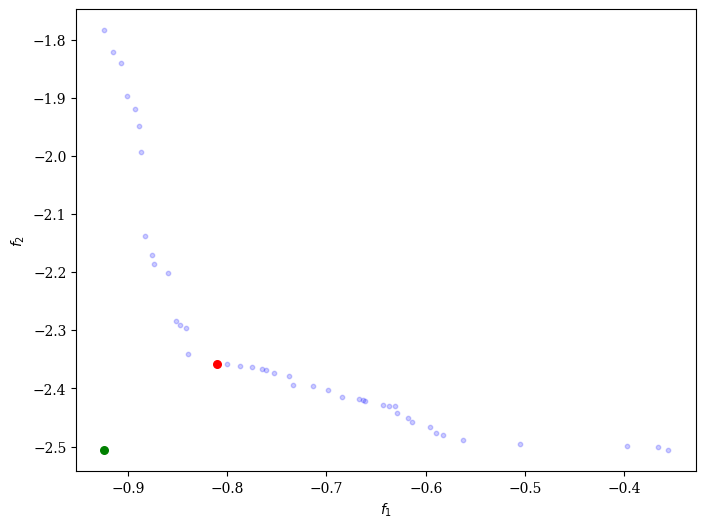

In [12]:
from pymoo.decomposition.asf import ASF

# Get the approximated ideal and nadir points
approx_ideal = res.F.min(axis=0)
approx_nadir = res.F.max(axis=0)

# Normalize the obtained front
nF = (res.F - approx_ideal) / (approx_nadir - approx_ideal)

weights = np.array([0.5, 0.5])
decomp = ASF()

I = decomp(nF, weights).argmin()
print("Best regarding decomposition: Point %s - %s" % (I, res.F[I]))

plot = Scatter()
plot.add(res.F, color="blue", alpha=0.2, s=10)
plot.add(res.F[I], color="red", s=30)
plot.add(approx_ideal, color="green", s=30)
plot.do()
# plot.apply(lambda ax: ax.arrow(0, 0, 0.5, 0.5, color='black',
#                                head_width=0.01, head_length=0.01, alpha=0.4))
plot.show()

Fitted from direct parameters.
Direct Parameters:
xi:    [0.789 0.34 ]
omega: [[0.151 0.085]
 [0.085 0.24 ]]
alpha: [ -7.72 -34.59]


None
None


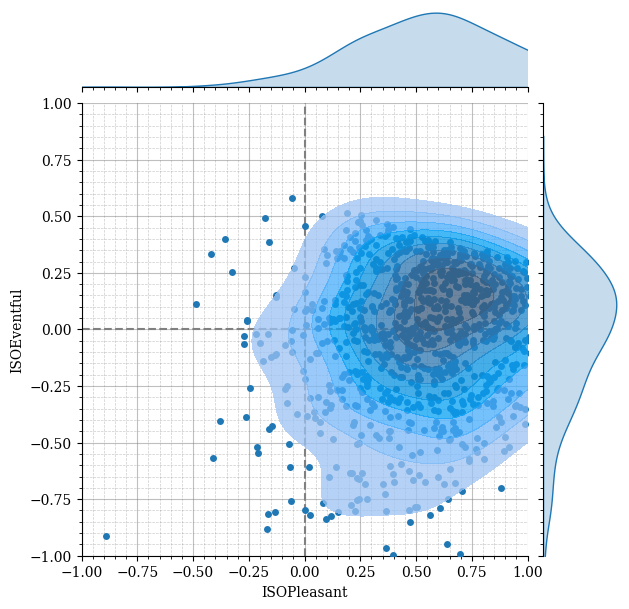

In [13]:
#| label: fig-pymoo-overall-target
#| fig-cap:
X = res.X[I]
tgt = MultiSkewNorm()
tgt.define_dp(
    np.array([X[0], X[1]]),
    np.array([[X[2], X[4]], [X[4], X[3]]]),
    np.array([X[5], X[6]]),
)
print(tgt.summary())
tgt.sample()
tgt.sspy_plot()

### Park Quality optimization

In [14]:
# initialize the thread pool and create the runner
mp = pathos.helpers.mp
n_process = 12
pool = mp.Pool(n_process)
runner = StarmapParallelization(pool.starmap)

park_problem = MyProblem(
    data=park_data, ranking=park_quality.sort_index()["Rank"], elementwise_runner=runner
)

park_res = minimize(
    park_problem, algorithm, termination, seed=42, save_history=True, verbose=True
)

pool.close()

park_F = park_res.F
park_X = park_res.X

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      150 |      2 |  0.000000E+00 |  0.7599240000 |             - |             -
     2 |      250 |      4 |  0.000000E+00 |  0.5266140000 |  0.2222222222 |         ideal
     3 |      350 |      6 |  0.000000E+00 |  0.1066560000 |  0.0924198251 |         ideal
     4 |      450 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0227272727 |         ideal
     5 |      550 |      6 |  0.000000E+00 |  0.000000E+00 |  0.0222222222 |         ideal
     6 |      650 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0232551845 |             f
     7 |      750 |     11 |  0.000000E+00 |  0.000000E+00 |  0.7586061972 |         nadir
     8 |      850 |     11 |  0.000000E+00 |  0.000000E+00 |  0.0212291577 |             f
     9 |      950 |     10 |  0.000000E+00 |  0.000000E+00 |  0.1042472364 |         ideal
    10 |     1050 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0225371829 |         nadir

In [15]:
weights = np.array([0.5, 0.5])
decomp = ASF()

with Recorder(Video("park_nsga2.mp4")) as rec:
    for entry in park_res.history:
        # Get the approximated ideal and nadir points
        approx_ideal = park_res.F.min(axis=0)
        approx_nadir = park_res.F.max(axis=0)

        # Normalize the obtained front
        nF = (entry.pop.get("F") - approx_ideal) / (approx_nadir - approx_ideal)
        park_I = decomp(nF, weights).argmin()
        sc = Scatter(title="Generation: %s" % entry.n_gen)
        sc.add(entry.pop.get("F"))
        sc.add(entry.pop.get("F")[park_I], color="red", s=30)
        sc.do()
        rec.record()


with Recorder(Video("park_nsga2_sspy.mp4")) as rec:
    for entry in park_res.history:
        # Get the approximated ideal and nadir points
        approx_ideal = park_res.F.min(axis=0)
        approx_nadir = park_res.F.max(axis=0)

        # Normalize the obtained front
        nF = (entry.pop.get("F") - approx_ideal) / (approx_nadir - approx_ideal)
        park_I = decomp(nF, weights).argmin()
        park_X = entry.pop.get("X")[park_I]
        park_tgt = MultiSkewNorm()
        park_tgt.define_dp(
            np.array([park_X[0], park_X[1]]),
            np.array([[park_X[2], park_X[4]], [park_X[4], park_X[3]]]),
            np.array([park_X[5], park_X[6]]),
        )
        park_tgt.sample()
        ss = sspy.plotting.density(
            x=park_tgt.sample_data[:,0],
            y=park_tgt.sample_data[:,1],
            title="Generation: %s" % entry.n_gen,
        )
        rec.record()

In [16]:
#| label: fig-pymoo-park-pareto
#| fig-cap: Multi-objective optimization Pareto front resulting from fitting to the Park ranking.

from pymoo.decomposition.asf import ASF

# Get the approximated ideal and nadir points
approx_ideal = park_res.F.min(axis=0)
approx_nadir = park_res.F.max(axis=0)

# Normalize the obtained front
nF = (park_res.F - approx_ideal) / (approx_nadir - approx_ideal)

weights = np.array([0.48, 0.52])
decomp = ASF()

park_I = decomp(nF, weights).argmin()
print("Best regarding decomposition: Point %s - %s" % (park_I, park_res.F[park_I]))


Best regarding decomposition: Point 10 - [-0.83333333 -1.85242857]


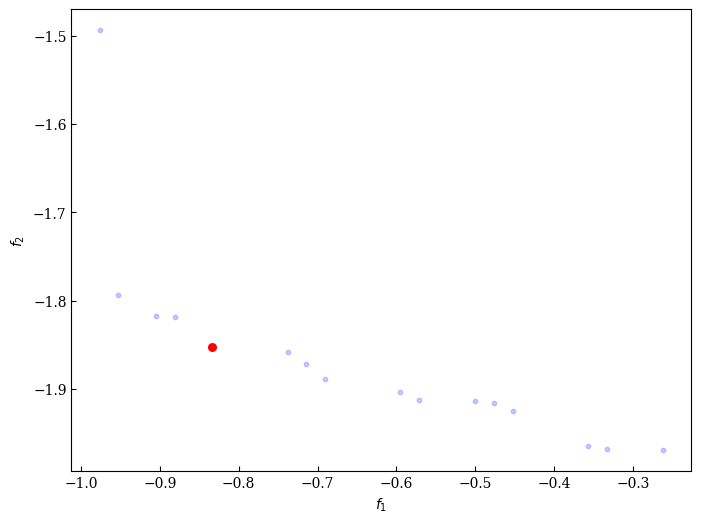

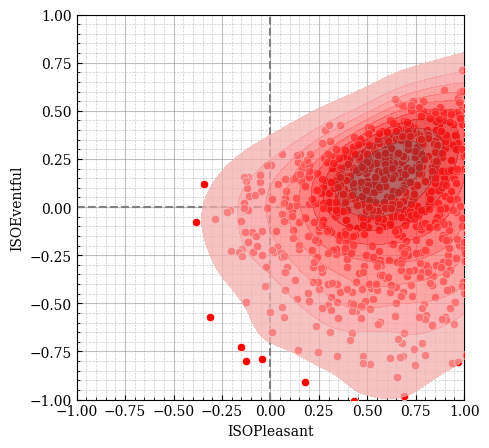

In [17]:
#| label: fig-pymoo-parks
#| fig-cap: "NSGA-II optimization to learn the MSN parameters which produce the Park ranking."
#| fig-subcap:
#|   - "Multi-objective optimization Pareto front. The selected solution is indicated in red."
#|   - "SCM distribution of the derived target distribution."
#| layout-ncol: 2
import matplotlib.pyplot as plt

park_X = park_res.X[park_I]
park_tgt = MultiSkewNorm()
park_tgt.define_dp(
    np.array([park_X[0], park_X[1]]),
    np.array([[park_X[2], park_X[4]], [park_X[4], park_X[3]]]),
    np.array([park_X[5], park_X[6]]),
)
park_tgt.sample()

# print(park_tgt.summary())

plot = Scatter()
plot.add(park_res.F, color="blue", alpha=0.2, s=10)
plot.add(park_res.F[park_I], color="red", s=30)
plot.do()
# plot.apply(lambda ax: ax.arrow(0, 0, 0.5, 0.5, color='black',
#                                head_width=0.01, head_length=0.01, alpha=0.4))
plot.show()
plt.show()



# park_tgt.sspy_plot()
df = pd.DataFrame(park_tgt.sample_data, columns=["ISOPleasant", "ISOEventful"])
sspy.plotting.density(
    df, color='red', scatter_kws={'color': 'red'}, title=None
)
plt.show()

In [18]:
print(park_tgt.summary())

Fitted from direct parameters.
Direct Parameters:
xi:    [0.616 0.436]
omega: [[0.129 0.017]
 [0.017 0.296]]
alpha: [ 1.826 -7.109]


None
None
